# CAB420 - Plot Gallery
## Part 5: Miscellaneous Plots
Dr Simon Denman (s.denman@qut.edu.au)

## Overview

This is part 5 of the plot gallery, and is simply all the plots that don't fit elsewhere.

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy
from sklearn.decomposition import PCA

## Making some fake data

Without data, there are no plots. We're creating two regression sets here, both with 100 features. The first set however has an effective rank fo 50, while the second has an effective rank of only 10. What this means is that the first dataset can be explained with 50 columns rather than the 100 we've got (i.e. 50% of them are redundant), but for the second 90% of the columns are just along for the ride.

In [2]:
X_reg_1, y_reg_1 = make_regression(random_state=42, n_samples=1000, n_features=100, n_informative=25, effective_rank=50, n_targets=1, bias=0.0, tail_strength=0.1, noise=0.05)
X_reg_2, y_reg_2 = make_regression(random_state=42, n_samples=1000, n_features=100, n_informative=5, effective_rank=10, n_targets=1, bias=0.0, tail_strength=0.1, noise=0.05)

### Cumulative Sum Curve

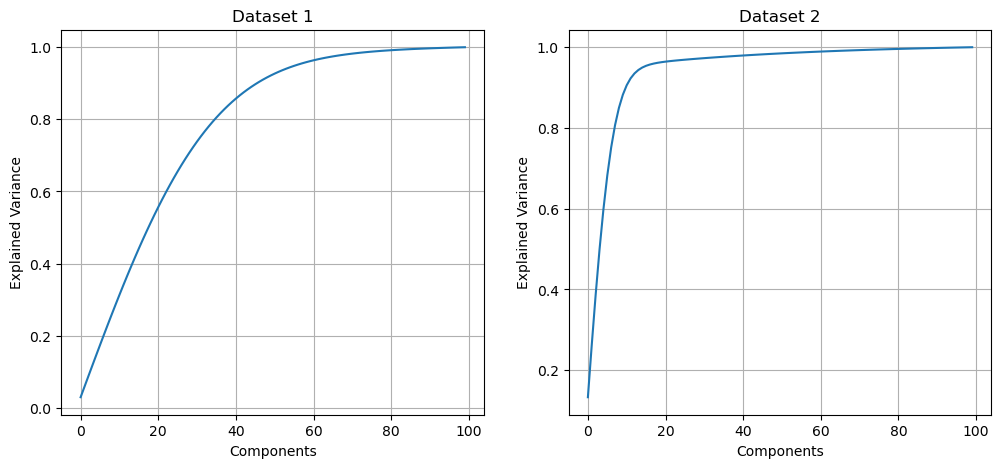

In [3]:
pca_1 = PCA().fit(X_reg_1)
pca_2 = PCA().fit(X_reg_2)

fig = plt.figure(figsize=[12, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(numpy.cumsum(pca_1.explained_variance_ratio_))
ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Dataset 1')
ax.grid(True, 'both')

ax = fig.add_subplot(1, 2, 2)
ax.plot(numpy.cumsum(pca_2.explained_variance_ratio_))
ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Dataset 2')
ax.grid(True, 'both')

**What's it show?**
The cummulative sum of explained variance for the principal components pulled out by PCA. Essentially, it says how many components you need to explain a certain percentage of the data. 

As for why these two look different to each other, remember what was written about the effective rank of the data (or if you don't remember, go and read that bit). For our first dataset, the effective rank is 50, for the second it's 10, so we see a far sharper curve in the second as most of the dimensions are rubbish, and thus we need fewer principal components to explain the data. Someone out there though is now wondering, "why then don't we see 100% of the variance explained at 50 and 10 components for these two datasets?" Excellent question mystery person. The reason is simply that our data does contain some noise, and we need all 100 components to explain all of that fully. As the noise is fairly low overall we see that most variation is explained by 50 and 10 components respectivley, but we don't quite explain everything.

**When would you use it?**
When deciding how many components to keep when using PCA. To be honest, you may not worry about plotting this and just work directly from the cummulative sum vector (the thing we plot).

**What does it not show?**
It doesn't tell us anything about the dimensions other than how much variance they capture. What those dimensions represent, or how well they capture discriminative information that might be useful for something like classification, is not here.

### Have I Forgotten Something?

Is there something missing? Should there be some other plot in this, or some other guide? It's possible I've forgotten things. If you think somethings missing, send your entries to cab420query@qut.edu.au. You won't go in the draw for anything, but I might update this series with whatever plots I've forgotten.